
# Analyzing COVID-19 data

![JMU LOGO](https://images.sidearmdev.com/resize?url=https%3a%2f%2fdxbhsrqyrr690.cloudfront.net%2fsidearm.nextgen.sites%2fjmusports.com%2fimages%2f2020%2f7%2f7%2fJMU.png&width=1416&type=png) 

COVID-19 is a respiratory disease caused by SARS-CoV-2, a coronavirus discovered in 2019. The virus spreads mainly from person to person through respiratory droplets and small particles produced when an infected person coughs, sneezes, or talks.

Data Source: [Center for Disease Control and Prevention](https://www.cdc.gov/dotw/covid-19/index.html#:~:text=COVID%2D19%20is%20a%20respiratory,coughs%2C%20sneezes%2C%20or%20talks.)

Author: john38kl@dukes.jmu.edu


## Import Data

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 4.9 MB/s eta 0:00:00


In [5]:
df = pd.read_excel('s3://johnson-241-2023-python/covid_data.xls')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12 00:00:00,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-11-12 00:00:00,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-10-12 00:00:00,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


## The Sum of Case Numbers Per Day


/tmp/ipykernel_8621/1334854301.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['dateRep'] = pd.to_datetime(df['dateRep']) #convert to date format


<AxesSubplot: xlabel='dateRep'>

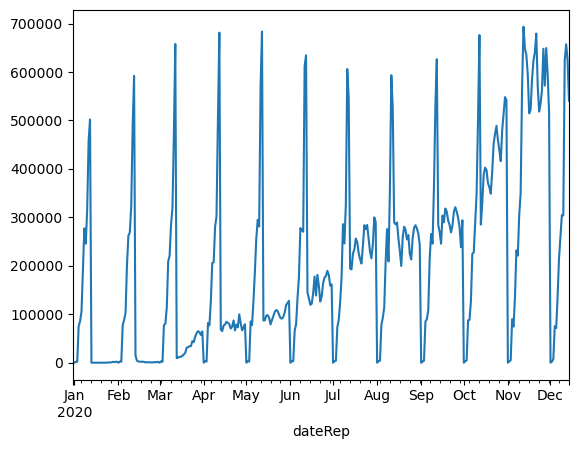

In [6]:
df['dateRep'] = pd.to_datetime(df['dateRep']) #convert to date format

sum_death_by_date = df.groupby('dateRep')['cases'].sum()
sum_death_by_date.plot()

## The Top 10 Countries with the Highest Deaths


<AxesSubplot: xlabel='countriesAndTerritories'>

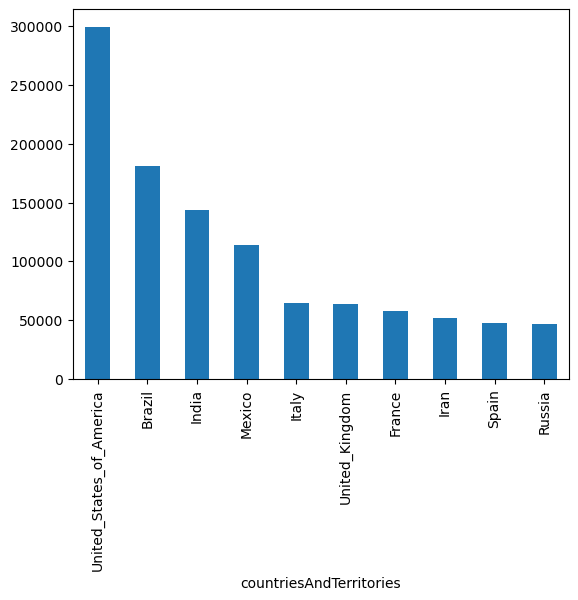

In [8]:
sum_death_by_country = df.groupby('countriesAndTerritories')['deaths'].sum()
sum_death_by_country.nlargest(10).plot.bar()

## The List of the Unique Countries and Territories


In [12]:
pd.unique(df['countriesAndTerritories'])


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Er

## Select Mexico data

In [18]:
mx_data = df.loc[df['countriesAndTerritories'] == 'Mexico']
mx_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
36970,2020-12-14,14,12,2020,8608,249,Mexico,MX,MEX,127575529.0,America,112.069298
36971,2020-12-13,13,12,2020,12057,685,Mexico,MX,MEX,127575529.0,America,110.329153
36972,2020-12-12,12,12,2020,12253,693,Mexico,MX,MEX,127575529.0,America,118.192730
36973,2020-11-12,11,12,2020,11897,671,Mexico,MX,MEX,127575529.0,America,108.588223
36974,2020-10-12,10,12,2020,21974,781,Mexico,MX,MEX,127575529.0,America,105.617434


## How the Number of Cases is Related to the Number of Deaths


<AxesSubplot: xlabel='cases', ylabel='deaths'>

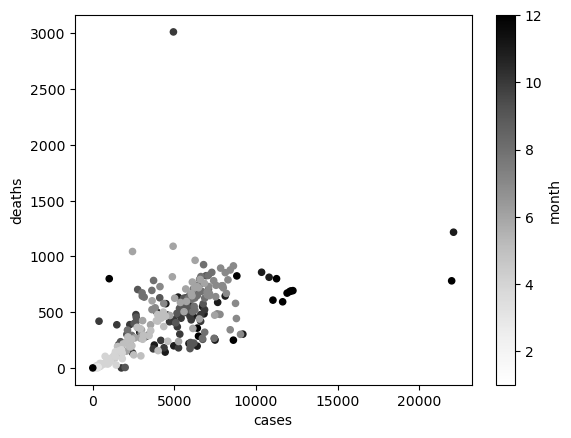

In [19]:
mx_data.plot.scatter(x='cases',y='deaths',c= 'month')


Cases were most prevalent in the beginning months of the year